## Problem 2

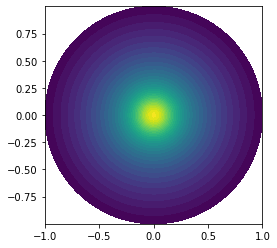

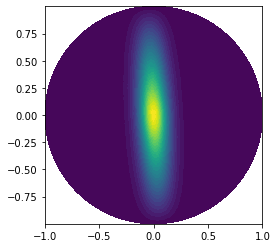

In [1]:
# Initialization
import matplotlib.pyplot as plt
%matplotlib inline

import dolfin as df
from dolfin import inner,nabla_grad
import math
import numpy as np
import logging
#from unconstrainedMinimization import InexactNewtonCG

logging.getLogger('FFC').setLevel(logging.WARNING)
logging.getLogger('UFL').setLevel(logging.WARNING)
df.set_log_active(False)

# Generate mesh for the unit circle domain.

# Uncomment this to generate mesh using mshr:
# import mshr
# mesh = mshr.generate_mesh(mshr.Circle(Point(0.,0.), 1.), 40)

# Alternatively, load the mesh:
mesh = df.Mesh("circle.xml")

# Define the finite element space
Vh = df.FunctionSpace(mesh, "Lagrange", 2)

u = df.TrialFunction(Vh)
u0 = df.Constant(0.0)
u_hat = df.TestFunction(Vh)
u_tilde = df.TrialFunction(Vh)

def boundary(x, on_boundary):
    return on_boundary

bc = df.DirichletBC(Vh, u0, boundary)

A1 = df.Constant(((10.0, 0.0),(0.0, 10.0)))
A2 = df.Constant(((1.0, -5.0),(-5.0, 100.0)))



f = df.Expression("exp(-100*(x[0]*x[0] + x[1]*x[1]))",degree=5)

# Define the variational problem (weak form)
grad1 = df.dot(A1*df.grad(u), df.grad(u_hat))*df.dx - f*u_hat*df.dx

a,L = df.lhs(grad1), df.rhs(grad1)

u_sol = df.Function(Vh)

df.solve( a==L , u_sol, bc)

df.plot(u_sol)
plt.show()

grad2 = df.dot(A2*df.grad(u), df.grad(u_hat))*df.dx - f*u_hat*df.dx

a,L = df.lhs(grad2), df.rhs(grad2)

u_sol = df.Function(Vh)

df.solve( a==L , u_sol, bc)

df.plot(u_sol)
plt.show()


## Problem 3

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import dolfin as df
import math
import numpy as np
import logging
from unconstrainedMinimization import InexactNewtonCG

logging.getLogger('FFC').setLevel(logging.WARNING)
logging.getLogger('UFL').setLevel(logging.WARNING)
df.set_log_active(False)


# Set the level of noise:
noise_std_dev = .3

# Load the image from file
data = np.loadtxt('image.dat', delimiter=',')
np.random.seed(seed=1)

noise = noise_std_dev*np.random.randn(data.shape[0], data.shape[1])
Lx = float(data.shape[1])/float(data.shape[0])
Ly = 1.

mesh = df.RectangleMesh(Point(0,0),Point(Lx,Ly), 200, 100)
V = df.FunctionSpace(mesh, "Lagrange",1)

# Generate the true image (u_true) and the noisy data (u_0)
class Image(UserExpression):
    def __init__(self, Lx, Ly, data, **kwargs):
        super().__init__(kwargs)
        self.data = data
        self.hx = Lx/float(data.shape[1]-1)
        self.hy = Ly/float(data.shape[0]-1)
        
    def eval(self, values, x):
        j = int(math.floor(x[0]/self.hx))
        i = int(math.floor(x[1]/self.hy))
        values[0] = self.data[i,j]
        
    def value_shape(self):
        return ()

trueImage  = Image(Lx, Ly, data, element=V.ufl_element())
noisyImage = Image(Lx, Ly, data+noise, element=V.ufl_element())

u_true  = interpolate(trueImage, V)
u_0     = interpolate(noisyImage, V)

vmin = np.min(u_0.vector().get_local())
vmax = np.max(u_0.vector().get_local())

plt.figure(figsize=[15,15])
plt.subplot(1,2,1)
plot(u_true, title="True Image", vmin=vmin, vmax = vmax)
plt.subplot(1,2,2)
plot(u_0, title="Noisy Image", vmin=vmin, vmax = vmax)
plt.show()

NameError: name 'Point' is not defined